# Visualizing COVID-19 hospitalizations in the US with *choromap*

**Javier Orman**  
GitHub repository for this ChoroMap: https://github.com/javierorman/choromap/  
LinkedIn: https://www.linkedin.com/in/javierorman/

Latest update: 1/28/2021

## 1. Introduction
In this notebook I showcase the use of the module **choromap**, which produces **animated choropleth maps**, to visualize the spread of COVID-19 in the United States. Data will be retrieved from the API of *The COVID Tracking Project at The Atlantic* and merged with US Census population data to calculate **hospitalization rates** for each state.

### Import dependencies

Data will be imported and organized with *pandas*. *Geopandas* will be used to work with geospatial data and visualizations will be made with *matplotlib*.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import geopandas as gpd

import requests

import os
import sys

from matplotlib import colors
from matplotlib import pyplot as plt

Set *module_path* for the directory containing the module *choromap*

In [2]:
from pathlib import Path

module_path = str(Path.cwd().parent)

if module_path not in sys.path:
    sys.path.append(module_path)

Next, import classes *ChoroMapBuilder* and *DataFramePrepper* from module *choromap*. The module is [available on GitHub](https://github.com/javierorman/choromap).

In [3]:
from choromap import ChoroMapBuilder, DataFramePrepper

## 2. COVID-19 data for each State

The data used here is available from the API of *The COVID Tracking Project at The Atlantic"*. More information [here](https://covidtracking.com/data/api).

In [4]:
us_covid_df = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv')
us_covid_df

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210128,AK,52150.0,NaN,NaN,NaN,totalTestsViral,1479849.0,42.0,1201.0,NaN,NaN,5.0,NaN,NaN,A,1/28/2021 03:59,2021-01-28T03:59:00Z,01/27 22:59,262.0,1201.0,2021-01-28T03:59:00Z,1479849.0,62705.0,1415473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,199,0,52150,12449,52150,1,1,6932258339f816d5d92e6907200e546fb5342eb3,0,0,0,0,0,NaN
1,20210128,AL,452734.0,95263.0,1759171.0,NaN,totalTestsPeopleViral,2116642.0,2052.0,41483.0,NaN,2533.0,NaN,1449.0,242143.0,A,1/28/2021 11:00,2021-01-28T11:00:00Z,01/28 06:00,7340.0,41483.0,2021-01-28T11:00:00Z,NaN,NaN,NaN,357471.0,5928.0,1412.0,NaN,2116642.0,NaN,NaN,NaN,103530.0,NaN,NaN,NaN,NaN,NaN,NaN,1,3648,8103,2211905,10607,2211905,168,0,29405d617beb57f1ee9b5f00a86aac1008f78acd,0,0,0,0,0,NaN
2,20210128,AR,290856.0,58518.0,2161833.0,NaN,totalTestsViral,2394171.0,996.0,13505.0,307.0,NaN,143.0,1414.0,268495.0,A+,1/28/2021 00:00,2021-01-28T00:00:00Z,01/27 19:00,4784.0,13505.0,2021-01-28T00:00:00Z,2394171.0,NaN,2161833.0,232338.0,3864.0,920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354207.0,68660.0,NaN,NaN,5,1892,12762,2452689,14233,2452689,42,58,7f491ba52aea5b93016e6ca41059b491f11fc5bf,0,0,0,0,0,NaN
3,20210128,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0.0,NaN,2020-12-01T00:00:00Z,2140.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,2140,0,2140,0,0,0138eb6fe94624353fb7066d0113058280086d56,0,0,0,0,0,NaN
4,20210128,AZ,743232.0,46684.0,2712847.0,NaN,totalTestsViral,6549568.0,4087.0,51349.0,1023.0,NaN,692.0,NaN,101104.0,A+,1/28/2021 00:00,2021-01-28T00:00:00Z,01/27 19:00,12819.0,51349.0,2021-01-28T00:00:00Z,6549568.0,NaN,NaN,696548.0,11440.0,1379.0,NaN,3409395.0,415234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4671,10704,3456079,45161,3456079,176,312,ef4f84f80eb115d6b32a4c6136a6ed1f4a5cf71f,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18637,20200117,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,0,0,0,0,0,effcc7b17054638471dec2f2a9cdbd3229d92042,0,0,0,0,0,NaN
18638,20200116,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,0,0,0,0,0,d9453d58f00994cff1f81639e95e532d1dd10138,0,0,0,0,0,NaN
18639,20200115,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,0,0,0,0,0,bd1eef4afdffd883e37be1d3f321dc3b0e75f591,0,0,0,0,0,NaN
18640,20200114,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,0,0,0,0,0,84aeea9c6a284b151

Here are the variables available in the data:

In [5]:
us_covid_df.columns

Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt',
       'death', 'hospitalized', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'deathConfirmed', 'deathProbable', 'totalTestEncountersViral',
       'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody',
       'negativeTestsAntibody', 'totalTestsPeopleAntibody',
       'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody',
       'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen',
       'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResultsIncrease', 'posNe

Next we change the format of the dates from *yyyymmdd* to *yyyy-mm-dd*.

In [6]:
def to_iso(date):
    """
    Convert a date (str) from yyyymmdd to yyyy-mm-dd,
    e.g. 20200128 -> 2020-01-28
    """
    x = str(date)
    return x[0:4] + '-' + x[4:6] + '-' + x[6:8]

In [7]:
us_covid_df['date'] = us_covid_df['date'].apply(lambda x: to_iso(x))

In [8]:
# First 5 rows
us_covid_df.head(5)

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-01-28,AK,52150.0,NaN,NaN,NaN,totalTestsViral,1479849.0,42.0,1201.0,NaN,NaN,5.0,NaN,NaN,A,1/28/2021 03:59,2021-01-28T03:59:00Z,01/27 22:59,262.0,1201.0,2021-01-28T03:59:00Z,1479849.0,62705.0,1415473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,199,0,52150,12449,52150,1,1,6932258339f816d5d92e6907200e546fb5342eb3,0,0,0,0,0,NaN
1,2021-01-28,AL,452734.0,95263.0,1759171.0,NaN,totalTestsPeopleViral,2116642.0,2052.0,41483.0,NaN,2533.0,NaN,1449.0,242143.0,A,1/28/2021 11:00,2021-01-28T11:00:00Z,01/28 06:00,7340.0,41483.0,2021-01-28T11:00:00Z,NaN,NaN,NaN,357471.0,5928.0,1412.0,NaN,2116642.0,NaN,NaN,NaN,103530.0,NaN,NaN,NaN,NaN,NaN,NaN,1,3648,8103,2211905,10607,2211905,168,0,29405d617beb57f1ee9b5f00a86aac1008f78acd,0,0,0,0,0,NaN
2,2021-01-28,AR,290856.0,58518.0,2161833.0,NaN,totalTestsViral,2394171.0,996.0,13505.0,307.0,NaN,143.0,1414.0,268495.0,A+,1/28/2021 00:00,2021-01-28T00:00:00Z,01/27 19:00,4784.0,13505.0,2021-01-28T00:00:00Z,2394171.0,NaN,2161833.0,232338.0,3864.0,920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354207.0,68660.0,NaN,NaN,5,1892,12762,2452689,14233,2452689,42,58,7f491ba52aea5b93016e6ca41059b491f11fc5bf,0,0,0,0,0,NaN
3,2021-01-28,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0.0,NaN,2020-12-01T00:00:00Z,2140.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,2140,0,2140,0,0,0138eb6fe94624353fb7066d0113058280086d56,0,0,0,0,0,NaN
4,2021-01-28,AZ,743232.0,46684.0,2712847.0,NaN,totalTestsViral,6549568.0,4087.0,51349.0,1023.0,NaN,692.0,NaN,101104.0,A+,1/28/2021 00:00,2021-01-28T00:00:00Z,01/27 19:00,12819.0,51349.0,2021-01-28T00:00:00Z,6549568.0,NaN,NaN,696548.0,11440.0,1379.0,NaN,3409395.0,415234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4671,10704,3456079,45161,3456079,176,312,ef4f84f80eb115d6b32a4c6136a6ed1f4a5cf71f,0,0,0,0,0,NaN


## 3. Population data

Because we are interested in the *rate of hospitalizations* in each state, we need import population data. Here we use a dataset from the US Census, [available here](https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx).

In [11]:
census_df = pd.read_excel('datasets/nst-est2019-01.xlsx', engine="openpyxl")

In [12]:
# Eliminate unnecessary rows and columns
census_df = census_df.iloc[8:59, [0, -1]].reset_index(drop=True)
census_df.columns = ['state_full', 'population']

# First 5 rows
census_df.head()

,state_full,population
0,.Alabama,4903185.0
1,.Alaska,731545.0
2,.Arizona,7278717.0
3,.Arkansas,3017804.0
4,.California,39512223.0


In [13]:
# Eliminate unnecessary characters
census_df['state_full'] = census_df['state_full'].str.replace('.', '')
census_df.head()

,state_full,population
0,Alabama,4903185.0
1,Alaska,731545.0
2,Arizona,7278717.0
3,Arkansas,3017804.0
4,California,39512223.0


Because the states in *us_covid_df* are represented by 2-letter codes, we will use [this dataset](https://worldpopulationreview.com/states/state-abbreviations) to properly format *census_df*.

In [14]:
codes_df = pd.read_csv('datasets/codes_data.csv')

In [15]:
codes_df.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [16]:
# Merge census_df and codes_df
pop_df = codes_df.merge(census_df, left_on='State', right_on='state_full', how='inner')

# Eliminate unnecessary columns
pop_df = pop_df.iloc[:, [2, 4]]

# Rename columns
pop_df.columns = ['state', 'population']

# Show the first 5 columns
pop_df.head()

,state,population
0,AL,4903185.0
1,AK,731545.0
2,AZ,7278717.0
3,AR,3017804.0
4,CA,39512223.0


In [17]:
# Merge pop_df and covid_df
us_covid_df = us_covid_df.merge(pop_df, on='state', how='left')
us_covid_df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,population
0,2021-01-28,AK,52150.0,NaN,NaN,NaN,totalTestsViral,1479849.0,42.0,1201.0,NaN,NaN,5.0,NaN,NaN,A,1/28/2021 03:59,2021-01-28T03:59:00Z,01/27 22:59,262.0,1201.0,2021-01-28T03:59:00Z,1479849.0,62705.0,1415473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,199,0,52150,12449,52150,1,1,6932258339f816d5d92e6907200e546fb5342eb3,0,0,0,0,0,NaN,731545.0
1,2021-01-28,AL,452734.0,95263.0,1759171.0,NaN,totalTestsPeopleViral,2116642.0,2052.0,41483.0,NaN,2533.0,NaN,1449.0,242143.0,A,1/28/2021 11:00,2021-01-28T11:00:00Z,01/28 06:00,7340.0,41483.0,2021-01-28T11:00:00Z,NaN,NaN,NaN,357471.0,5928.0,1412.0,NaN,2116642.0,NaN,NaN,NaN,103530.0,NaN,NaN,NaN,NaN,NaN,NaN,1,3648,8103,2211905,10607,2211905,168,0,29405d617beb57f1ee9b5f00a86aac1008f78acd,0,0,0,0,0,NaN,4903185.0
2,2021-01-28,AR,290856.0,58518.0,2161833.0,NaN,totalTestsViral,2394171.0,996.0,13505.0,307.0,NaN,143.0,1414.0,268495.0,A+,1/28/2021 00:00,2021-01-28T00:00:00Z,01/27 19:00,4784.0,13505.0,2021-01-28T00:00:00Z,2394171.0,NaN,2161833.0,232338.0,3864.0,920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354207.0,68660.0,NaN,NaN,5,1892,12762,2452689,14233,2452689,42,58,7f491ba52aea5b93016e6ca41059b491f11fc5bf,0,0,0,0,0,NaN,3017804.0
3,2021-01-28,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0.0,NaN,2020-12-01T00:00:00Z,2140.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,2140,0,2140,0,0,0138eb6fe94624353fb7066d0113058280086d56,0,0,0,0,0,NaN,NaN
4,2021-01-28,AZ,743232.0,46684.0,2712847.0,NaN,totalTestsViral,6549568.0,4087.0,51349.0,1023.0,NaN,692.0,NaN,101104.0,A+,1/28/2021 00:00,2021-01-28T00:00:00Z,01/27 19:00,12819.0,51349.0,2021-01-28T00:00:00Z,6549568.0,NaN,NaN,696548.0,11440.0,1379.0,NaN,3409395.0,415234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4671,10704,3456079,45161,3456079,176,312,ef4f84f80eb115d6b32a4c6136a6ed1f4a5cf71f,0,0,0,0,0,NaN,7278717.0


In [18]:
# Create column 'hosp_curr_100000' with the rate of hospitalizations per 100000 residents in each State.
us_covid_df['hosp_curr_100000'] = (us_covid_df['hospitalizedCurrently'] / us_covid_df['population']) * 100000

## 4. Geographic data

The geospatial shapefiles for drawing the map of the United States are available [here](https://www.arcgis.com/home/item.html?id=f7f805eb65eb4ab787a0a3e1116ca7e5#). 

In [19]:
filepath = 'shapefiles/states_21basic/states.shp'
us_geom_df = gpd.read_file(filepath)

Take out Alaska and Hawaii to keep a practical view of the map.

<AxesSubplot:>

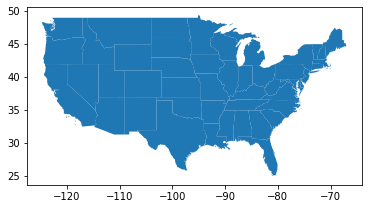

In [20]:
us_geom_df = us_geom_df[us_geom_df['STATE_ABBR'].isin(['AK', 'HI']) == False]
us_geom_df.plot()

## 5. Map

The module *choromap* includes two classes: ChoroMapBuilder, which has the methods necessary to make the maps and DataFramePrepper, which prepares the dataframes to pass to ChoroMapBuilder.

DataFramePrepper takes two parameters: *info_df* and *geom_df*. 
1. *us_covid_df* is our informational DataFrame with dates, locations and values (rate of hospitalizations in this case) and is passed as *info_df*. 
2. *us_geom_df* is our geometric DataFrame with locations and the vector information to draw the shapes of the states. It's passed as *geom_df*.

In [21]:
prepper = DataFramePrepper(info_df=us_covid_df, geom_df=us_geom_df)

In [22]:
# Prepare the informational DataFrame by selecting the columns to focus on. 
# roll_avg being True means that daily values of hospitalizations will be smoothed out through a 7-day window average.
prepper.prep_info_df(category='hosp_curr_100000', col_dates='date', col_location='state', roll_avg=True)

# Prepare geometric DataFrame
prepper.prep_geom_df(location_col='STATE_ABBR', geometry_col='geometry')

# Merged the info_df and geom_df
merged_df = prepper.merge_info_geom()

# Show top 5 rows of merged_df
merged_df.head()

,geometry,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14,2020-11-15,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-

In [23]:
builder = ChoroMapBuilder(merged_df=merged_df)

Next we build the maps using the ChoroMapBuilder method *make_map*. Here is the documentation on it:

In [24]:
help(ChoroMapBuilder.make_map)

Help on function make_map in module choromap:

make_map(self, title, subtitle, unit, save_name, labels=True, lang='en', fig_size=(16, 8), color='OrRd', count='all', begin_date=None, norm=<class 'matplotlib.colors.Normalize'>, fps=8)
    It calls for the whole process of creating the maps and turning them into videos.
    
    Parameters:
        title : str
            Title to be displayed above the map
        subtitle : str
            Possible use is to reference the source of the data
        unit : str
            Units for colorbar
        save_name : str
            Name to be used in exports (static map images, gifs, videos) and directory paths
        labels : bool
            If true, the make_static_maps method will insert labels in -hopefully- safe regions of the map
        lang : language code for babel.format_date, passed to pretty_date method
        fig_size : tuple (height, width)
            Size for the figure.
        color : passes to cmap option in Pandas plot f

In [25]:
builder.make_map(title='Rate of current COVID-19 hospitalizations in each state',
                      subtitle='Source: The COVID Tracking Project at The Atlantic', 
                      unit='COVID-19 hospitalizations per 100,000 residents',
                      save_name='hosp_curr_us_100000',
                      count='all', begin_date='2020-03-01',
                      color='Reds', fps=6)